In [243]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, auc

In [218]:
#Load dataset
df = pd.read_csv('heart attack possibility.csv')

In [219]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [221]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [222]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [223]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

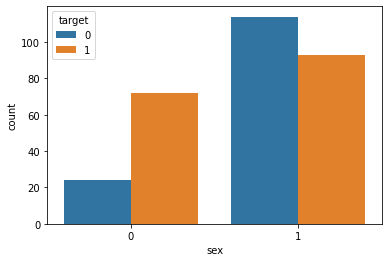

In [224]:
sns.countplot(x = df.sex, hue = df.target)

In [225]:
#Splitting dependent and independent features
X = df.iloc[:, df.columns != 'target']
y = df.iloc[:, df.columns == 'target']

In [226]:
#Train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [227]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [228]:
y_train = y_train.values[:,0]
y_test = y_test.values[:,0]

In [229]:
model = LogisticRegression()

In [230]:
model.fit(X_train, y_train)

LogisticRegression()

In [231]:
y_train_pred = model.predict_proba(X_train)
y_test_pred = model.predict_proba(X_test)

In [232]:
#roc auc score of train data
roc_auc_score(y_train, y_train_pred[:,1])

0.9408512990602542

In [233]:
#roc auc score of test data
roc_auc_score(y_test, y_test_pred[:,1])

0.8419354838709677

In [171]:
#Finding tpr, fpr and thresholds for test data
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred[:,1])

In [249]:
#Below are the thresholds we got for test data
thresholds

array([1.99542613, 0.99542613, 0.95969086, 0.9573745 , 0.91589962,
       0.90774925, 0.86495562, 0.85411281, 0.80654262, 0.78866215,
       0.78374192, 0.78189181, 0.74417502, 0.7095639 , 0.39773518,
       0.36946881, 0.30500113, 0.22558385, 0.07973352, 0.07170917,
       0.05077097, 0.00265453])

In [200]:
#For each threshold let's predict on test data and find the accuracy score
lst_acc_score = []
for threshold in thresholds:
    y_pred = np.where(y_test_pred[:,1]>threshold,1,0)
    lst_acc_score.append((threshold, accuracy_score(y_test, y_pred)))

In [213]:
accuracy_ls = pd.DataFrame(lst_acc_score, columns = ['threshold', 'accuracy'])

In [250]:
#Top 5 rows with highest accuracy
accuracy_ls.sort_values(by = 'accuracy', ascending = False, inplace = True)
accuracy_ls.head()

,threshold,accuracy
15,0.369469,0.770492
16,0.305001,0.754098
14,0.397735,0.754098
18,0.079734,0.737705
19,0.071709,0.737705


For threshold 0.3694 we got highest accuracy, so we go with that value

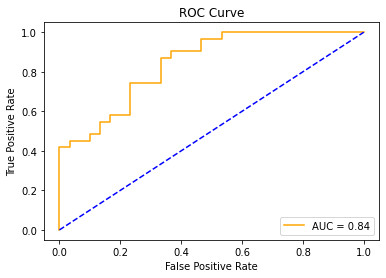

In [269]:
#Plot roc curve
plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f'%auc(fpr, tpr))
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc = 'lower right')
plt.show()